In [1]:
!pip3 install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#import libarary
import pandas as pd
import numpy as np
import html 
import re
import warnings 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn_extra.cluster import KMedoids
#Step3 and Step4
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer #for vectorize text into sparse matrix 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from io import StringIO
from sklearn.model_selection import cross_val_score
from IPython.display import display
import itertools

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eBdesk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eBdesk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#load the data
df=pd.read_csv("C:/Users/eBdesk/Desktop/SupervisorConf/media/dataTraining3/1st/final/data.csv")

In [5]:
df

sumber  \
0            media indonesia   
1            media indonesia   
2                     kompas   
3           bisnis indonesia   
4      tribun news palembang   
...                      ...   
10427     tribun news kupang   
10428              suara.com   
10429               tempo.co   
10430         pikiran rakyat   
10431      tribun news batam   

                                                    link           created_at  \
0      https://mediaindonesia.com/ekonomi/370779/asos...  2020-12-02 17:35:48   
1      https://mediaindonesia.com/ekonomi/370781/real...  2020-12-02 17:45:34   
2      https://megapolitan.kompas.com/read/2020/12/08...  2020-12-08 03:40:45   
3      https://market.bisnis.com/read/20201207/192/13...  2020-12-07 00:20:13   
4      https://palembang.tribunnews.com/2020/12/05/us...  2020-12-05 06:17:21   
...                                                  ...                  ...   
10427  https://kupang.tribunnews.com/2020/12/01/rasa-...  2020-12-01 03:37:49   
10428  https://www.suara.com/sport/2020/12/01/080821/...  2020-12-01 01:47:24   
10429  https://sport.tempo.co/read/1410433/fia-dan-fo...  2020-12-01 02:33:28   
10430  https://www.pikiran-rakyat.com/bola/pr-0110395...  2020-12-01 16:43:33   
10431  https://batam.tribunnews.com/2020/12/01/update...  2020-12-01 02:38:22   

                   category                                            content  
0      business and economy  ASOSIASI dan pelaku pasar mendukung penuh kebi...  
1      business and economy  KEMENTERIAN Keuangan mencatat realisasi belanj...  
2      business and economy  Kota Depok Jawa Barat kembali ditetapkan sebag...  
3      business and economy  Sinovac Biotech China mengatakan bahwa mereka ...  
4      business and economy  Ustaz ustazah marbot hingga Ketua RT di Palemb...  
...                     ...                                                ...  
10427                sports  Dua perasaan berbeda dirasakan oleh kiper Pers...  
10428                sports  Petugas medis Formula 1 (F1) mengungkapkan bah...  
10429                sports  Formula 1 memulai penyelidikan atas kecelakaan...  
10430                sports  Liga Primer Inggris 2020-2021 menutup pekan ke...  
10431                sports  Update kabar terbaru Raul Jimenez setelah insi...  

[10432 rows x 5 columns]

In [6]:
katagori = df['category'].value_counts()
katagori

lifestyle                 1072
law and crimes            1071
sports                    1051
health and medicine       1051
entertainment             1047
education                 1045
science and technology    1043
politics and election     1022
business and economy      1017
disaster and accident     1013
Name: category, dtype: int64

In [7]:
nanvaluekategori = df['category'].isnull().sum()
nanvaluecontent = df['content'].isnull().sum()
nanvaluekategori,nanvaluecontent

(0, 0)

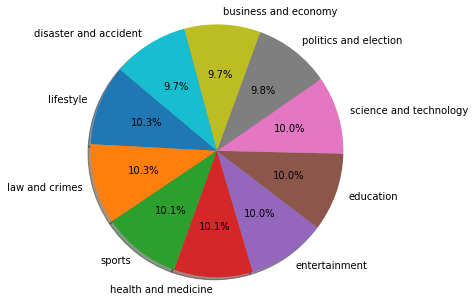

In [8]:
#(menampilkan jumlah data dlm grafik)
plt.figure(figsize=(5,5))
labels = katagori.index.tolist()
sizes = katagori
explode = (0,0,0,0,0,0,0,0,0,0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [9]:
NewsData = df.drop(columns=['sumber', 'link','created_at'])
NewsData

category                                            content
0      business and economy  ASOSIASI dan pelaku pasar mendukung penuh kebi...
1      business and economy  KEMENTERIAN Keuangan mencatat realisasi belanj...
2      business and economy  Kota Depok Jawa Barat kembali ditetapkan sebag...
3      business and economy  Sinovac Biotech China mengatakan bahwa mereka ...
4      business and economy  Ustaz ustazah marbot hingga Ketua RT di Palemb...
...                     ...                                                ...
10427                sports  Dua perasaan berbeda dirasakan oleh kiper Pers...
10428                sports  Petugas medis Formula 1 (F1) mengungkapkan bah...
10429                sports  Formula 1 memulai penyelidikan atas kecelakaan...
10430                sports  Liga Primer Inggris 2020-2021 menutup pekan ke...
10431                sports  Update kabar terbaru Raul Jimenez setelah insi...

[10432 rows x 2 columns]

In [10]:
NewsData['content'] = NewsData['content'].str.lower()
NewsData

category                                            content
0      business and economy  asosiasi dan pelaku pasar mendukung penuh kebi...
1      business and economy  kementerian keuangan mencatat realisasi belanj...
2      business and economy  kota depok jawa barat kembali ditetapkan sebag...
3      business and economy  sinovac biotech china mengatakan bahwa mereka ...
4      business and economy  ustaz ustazah marbot hingga ketua rt di palemb...
...                     ...                                                ...
10427                sports  dua perasaan berbeda dirasakan oleh kiper pers...
10428                sports  petugas medis formula 1 (f1) mengungkapkan bah...
10429                sports  formula 1 memulai penyelidikan atas kecelakaan...
10430                sports  liga primer inggris 2020-2021 menutup pekan ke...
10431                sports  update kabar terbaru raul jimenez setelah insi...

[10432 rows x 2 columns]

In [11]:
# untuk menghapus apapun selain text 
NewsData['content']=NewsData['content'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])","")
#step tokenize
NewsData['content'] = NewsData['content'].apply(nltk.word_tokenize)
NewsData

category                                            content
0      business and economy  [asosiasi, dan, pelaku, pasar, mendukung, penu...
1      business and economy  [kementerian, keuangan, mencatat, realisasi, b...
2      business and economy  [kota, depok, jawa, barat, kembali, ditetapkan...
3      business and economy  [sinovac, biotech, china, mengatakan, bahwa, m...
4      business and economy  [ustaz, ustazah, marbot, hingga, ketua, rt, di...
...                     ...                                                ...
10427                sports  [dua, perasaan, berbeda, dirasakan, oleh, kipe...
10428                sports  [petugas, medis, formula, f, mengungkapkan, ba...
10429                sports  [formula, memulai, penyelidikan, atas, kecelak...
10430                sports  [liga, primer, inggris, menutup, pekan, ke, de...
10431                sports  [update, kabar, terbaru, raul, jimenez, setela...

[10432 rows x 2 columns]

In [12]:
data = pd.read_csv("C:\\Users\\eBdesk\\Documents\\Untitled Folder\\indonesian_stopword.txt")
data['\'\'']
NewsData['content'] = NewsData['content'].apply(lambda x: [y for y in x if y not in data['\'\''].tolist()])
stopword = NewsData
stopword

category                                            content
0      business and economy  [asosiasi, pelaku, pasar, mendukung, penuh, ke...
1      business and economy  [kementerian, keuangan, mencatat, realisasi, b...
2      business and economy  [kota, depok, jawa, ditetapkan, zona, merah, w...
3      business and economy  [sinovac, biotech, china, dana, us, pengembang...
4      business and economy  [ustaz, ustazah, marbot, ketua, rt, palembang,...
...                     ...                                                ...
10427                sports  [perasaan, berbeda, dirasakan, kiper, persib, ...
10428                sports  [petugas, medis, formula, f, pembalap, tim, ha...
10429                sports  [formula, penyelidikan, kecelakaan, mengerikan...
10430                sports  [liga, primer, inggris, menutup, pekan, pertan...
10431                sports  [update, kabar, terbaru, raul, jimenez, inside...

[10432 rows x 2 columns]

In [13]:
#untuk mengubah field sentimen menjadi angka untuk mempercepat proses
NewsData2 = sorted(NewsData['category'].unique())
NewsData_mapping = dict(zip(NewsData2, range(0, len(NewsData2) + 1)))
NewsData['category']  = NewsData['category'].map(NewsData_mapping).astype(int)
NewsData_mapping = NewsData
NewsData_mapping

category                                            content
0             0  [asosiasi, pelaku, pasar, mendukung, penuh, ke...
1             0  [kementerian, keuangan, mencatat, realisasi, b...
2             0  [kota, depok, jawa, ditetapkan, zona, merah, w...
3             0  [sinovac, biotech, china, dana, us, pengembang...
4             0  [ustaz, ustazah, marbot, ketua, rt, palembang,...
...         ...                                                ...
10427         9  [perasaan, berbeda, dirasakan, kiper, persib, ...
10428         9  [petugas, medis, formula, f, pembalap, tim, ha...
10429         9  [formula, penyelidikan, kecelakaan, mengerikan...
10430         9  [liga, primer, inggris, menutup, pekan, pertan...
10431         9  [update, kabar, terbaru, raul, jimenez, inside...

[10432 rows x 2 columns]

In [14]:
NewsData2

['business and economy',
 'disaster and accident',
 'education',
 'entertainment',
 'health and medicine',
 'law and crimes',
 'lifestyle',
 'politics and election',
 'science and technology',
 'sports']

In [15]:
NewsData['content'] = NewsData['content'].str.join(" ")
NewsData.head()

category                                            content
0         0  asosiasi pelaku pasar mendukung penuh kebijaka...
1         0  kementerian keuangan mencatat realisasi belanj...
2         0  kota depok jawa ditetapkan zona merah wilayah ...
3         0  sinovac biotech china dana us pengembangan vak...
4         0  ustaz ustazah marbot ketua rt palembang meneri...

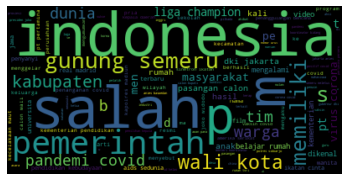

In [16]:
#wordcloud untuk mengetahui text apa saja yang sering keluar
text = NewsData['content'].to_string()
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
#stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
#stemming process
i=0
stm = NewsData
stm_tfidf=NewsData
NewsData
import array

In [18]:
from tqdm.notebook import tqdm as tqdm
i=0
list1 = []
for index,row in tqdm(stm.iterrows()):
  i=i+1
  res= stemmer.stem(row['content'])
  list1.append(res)
stm_tfidf['content']=list1

In [19]:
import array
for index,row in stm_tfidf.iterrows():
  print(row['content'])

asosiasi laku pasar dukung penuh bijak perintah jual produk vape konsumen usia kandung susu atur atur perintah produk vape untuk okok konvensional kurang biasa rokok kurang risiko sehat ketua asosiasi vaper indonesia apvi aryo andriyanto terang resmi aryo bisnis industri fokus tanggung sosial rokok elektrik salah satu komitmen cegah guna rokok elektrik anak umur rokok vape nada sekjen aliansi usaha hantar nikotin elektronik indonesia appnindo roy lefrans wungow roy dorong industri promosi konsumen usia cegah pakai okok terap atur batas usia guna produk vape mutlak batas produk okok dewasa laku industri tanggung batas akses vape anakanak industri produk vape atur bijak kelak atur produk konsumen disiplin bayar cukai sesuai tentu komitmen cegah produk vape akses usia okok roy harap perintah libat asosiasi keluar bijak kait produk vape pasang larang anakanak masuk ritel vape menteri uang catat realisasi terima cukai hasil tembakau rokok capai tumbuh banding periode cukai hasil tembakau gr

tarif cukai rokok alami naik ratarata salah tuju naik penuh target terima cukai anggar dapat belanja negara apbn perintah tetap target terima cukai tipis banding cukai hasil tembakau cht alias rokok andal utama target cukai rokok apbn target terima negara cht menteri uang sri mulyani indrawati
bank indonesia bi lembaga otoritas moneter regulator bidang sistem bayar sambut upaya dukung ekonomi digital indonesia direktur departemen kembang umkm lindung konsumen bi bandoe widiarto jadi ekonomi digital kembang indonesia rujuk tren digitalisasi utama pandemi covid giat ekonomi rumah belanja rumah ajar rumah rumah akibat ada digitalisasi bandoe webinar bangunresolusi talks digitalisasi uang tingkat ekonomi bi potensi ekonomi digital indonesia rembet digitalisasi perban kembang fintech layan transaksi uang digital potensi indonesia sungguh kembang bandoe sisi perintah bandoe nilai perintah serius kembang digitalisasi cermin besar anggar alokasi palapa ring program kembang internet sisi perint

korban tinggal dunia celaka maut alunalun tanjungsari kabupaten sumedang jawa tambah berita korban tewas celaka untun korban tewas korban nama m noval tinggal dunia rsud kabupaten sumedang data polisi kronologi tabrak truk tronton nomor z hb laju arah bandung tuk sumedang truk hilang kendali tabrak motor honda beat z aag gerobak dagang henti situ truk sambar angkot trayek rancakalong tanjungsari z ac tabrak mobil pajero sport d vcn truk henti tabrak truk nomor polisi e vc bangun ruko pinggir jalan celaka tangan satu lintas polres sumedang polsek tanjungsari sopir truk aman celaka untun kabupaten sumedang truk fuso nomor polisi z hb tabrak kendara alunalun tanjungsari kabupaten sumedang truk tabrak kendara sopir truk den susanto aman direktur ditlantas polda jabar kombes eddy djunaedi via ponselnya edar rekam video pascakejadian truk tabrak rumah kendara jalan kondisi atur rusak tinggal luka ringan luka berat kendara tabrak sepeda motor yaknu f rc z aag polisi selidik sebab celaka kenda

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




wali kota tangerang airin rachmi diany ungkap sebab tangsel zona merah sebar covid provinsi banten airin lepas tingkat angka positif mati akibat covid pekan tangsel zona merah tambah positif mati airin balai kota tangerang airin perintah kota tangerang lacak sebab lonjak angka positif covid tentu langkah tangan laku tracking tambah positif mana tangan tingkat angka mati airin sebab pasien covid lambat rumah sakit periksa pasien jalan awat rumah sakit alami buru mati ya rumah sakit lambat airin berita dinas sehat provinsi banten baru data peta sebar covid kabupatenkota wilayah banten dasar data publikasi situs resmi wwwinfocoronabantenprovgoid kota tangerang status zona merah sebar covid tingkat risiko tular
lanskap bukit tandus dang batang pohon bidara diri tegak kanan layar rumah gubuk atap ilalang kiri frame tunggal film perempuan jemur pakai samping rumah bedeknya meter rumah pohon bidara anak perempuan main ayun suara angin gonggong anjing kampung buka dialog ria anak lari kawan a

eks latih barcelona quique setien ungkit terima peser duit sangon eks klub setien seret barcelona adil kait pecat tengah sesuai kontrak setien terima duit euro sangon pecat uang barcelona lilit uang barcelona kompensasi tawar telepon pecat setin lansir marca asisten latih bawa meja hijau eder sarabia fran soto jon pascua capai sepakat barcelona uang kompensasi gaji setien tuntut sangon euro pecat resmi setien barcelona vakum tibatiba klub angkat ronald koeman latih jadi pekan blaugrana hajar bayern munchen liga champions sisi barcelona dera uang utang euro tengah bengkak mana utang barcelona capai euro barcelona inisiatif potong gaji main kali tutup utang tumpuk tentang lionel messi cs capai sepakat potong gaji sepakat barcelona hemat euro alokasi kurang beban utang
thomas bach lapor maju lawan jalan jabat presiden komite olimpiade internasional ioc lansir afp bach acara jerman usia konfirmasi isi jabat sesi ioc athena bach pilih memang jabat delapan bos ioc ganti jacques rogge belgia 

babak sisih grup c liga champions laksana kali gilir porto fc jamu manchester city estadio do dragao tanding saksi langsung vidiocom tanding manchester city hasil unggul porto hasil menang lawan manchester city temu porto hasil menang lawan marseille olympiacos menang porto klub bawa urut papan klasemen grup c sembilan poin manchester city puncak belas poin hadap laga esok klub samasama kondisi lelah jadwal tanding padat manchester city main laga lanjut liga inggris lawan burnley porto main liga portugis hadap santa clara
sepak bola nasional kreatif manfaat luang imbas henti kompetisi tan berwirausaha ambil lisensi latih kembang hobi latih persipura jayapura jacksen f tiago kreatif manfaat libur liga pantau libat football camp main usia akar rumput giat rencana selenggara enam lapang sepakbola kusuma agrowisata kota batu lokasi persipura jayapura jalan pusat latih target serta workshop pemainpemain akar rumput usia jacksen f tiago acara football camp partisipan program bekal tapak tang

In [20]:
stm_tfidf = NewsData
NewsData

category                                            content
0             0  asosiasi laku pasar dukung penuh bijak perinta...
1             0  menteri uang catat realisasi belanja program p...
2             0  kota depok jawa tetap zona merah wilayah risik...
3             0  sinovac biotech china dana us kembang vaksin c...
4             0  ustaz ustazah marbot ketua rt palembang terima...
...         ...                                                ...
10427         9  asa beda rasa kiper persib bandung dhika bayan...
10428         9  tugas medis formula f balap tim haas romain gr...
10429         9  formula lidi celaka keri alami balap haas roma...
10430         9  liga primer inggris tutup pekan tanding tandin...
10431         9  update kabar baru raul jimenez insiden bentur ...

[10432 rows x 2 columns]

In [23]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def tokenize(text):
    return [stemmer.stem(text)]
#tfidf untuk no stemming
#tfidf_wm = tfidfvectorizer.fit_transform(NewsData['content'])
vectorizer2 = TfidfVectorizer(stop_words = None, tokenizer = None)
tfidf_wm = vectorizer2.fit_transform(NewsData['content'])
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

59646
['aa', 'aaa', 'aaaa', 'aaal', 'aaangurah', 'aac', 'aad', 'aadhaar', 'aaf', 'aafiyah', 'aafsalahudin', 'aag', 'aagwa', 'aah', 'aaji', 'aakn', 'aakrab', 'aal', 'aalfieri', 'aali', 'aaliya', 'aaliyaah', 'aaliyah', 'aam', 'aamiin', 'aamin', 'aamir', 'aan', 'aap', 'aar', 'aaron', 'aarp', 'aars', 'aas', 'aasia', 'aau', 'aaui', 'aayiram', 'ab', 'abaaba', 'abab', 'ababa', 'ababel', 'ababil', 'abacus', 'abad', 'abadi', 'abah', 'abai', 'abalabal']


In [24]:
df1 = pd.DataFrame(tfidf_wm.toarray(), columns=vectorizer2.get_feature_names())
df1

aa  aaa  aaaa  aaal  aaangurah  aac  aad  aadhaar  aaf  aafiyah  ...  \
0      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
1      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
2      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
3      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
4      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
...    ...  ...   ...   ...        ...  ...  ...      ...  ...      ...  ...   
10427  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
10428  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
10429  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
10430  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
10431  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   

       zuremi  zurich  zus  zuur  zvezda   zw  zwirner   zy  zydus  zzooming  
0         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
1         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
2         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
3         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
4         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
...       ...     ...  ...   ...     ...  ...      ...  ...    ...       ...  
10427     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
10428     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
10429     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
10430     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
10431     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  

[10432 rows x 59646 columns]

In [25]:
X = df1
y = stm_tfidf['category']
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state = 20,
                                                 test_size = 0.3)

In [26]:
print('The length of the trainning set are {}'.format(len(X_train)))
print('The length of the test set are {}'.format(len(X_test)))

The length of the trainning set are 7302
The length of the test set are 3130


In [27]:
kmedoids = KMedoids(n_clusters=10, random_state=100,).fit(X_train)

In [28]:
kmedoids.labels_

array([2, 2, 9, ..., 0, 5, 0], dtype=int64)

In [29]:
kmedoids.inertia_

9703.574004941953

In [30]:
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [31]:
unique(kmedoids.labels_)

2
9
5
8
1
4
7
0
3
6


In [32]:
kmedoids.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
y_pred1 = kmedoids.predict(X_test)

In [34]:
unique(y_pred1)

8
1
0
2
3
4
5
6
7
9


In [35]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    print(contingency_matrix)
    print(np.sum(contingency_matrix))
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [36]:
purity_score(y_test,y_pred1)

[[ 60  28  52  13  11  37  33   3  54   6]
 [ 11   1  15 215   1  16  18  11   1  20]
 [  6 101  79   0  94   6   3  15  24   1]
 [ 34   7 177   7  17  26  18  12   8  13]
 [ 85   5 124   1   0  26  36  18  13   3]
 [ 38  16  61  12   8  38  23  11   8  85]
 [ 42  17 125  32   5  41  27  10  21   4]
 [ 26  13  20   3   2 219   7   1  26  10]
 [ 59  23  73  37  11  18  26   8  36   3]
 [ 67  10  90  19  14  54  17  28   4  17]]
3130


0.34952076677316296

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X_test, y_pred1)
print(silhouette_avg)

0.005180326644622979


In [41]:
sample_silhouette_values = silhouette_samples(X_test, y_pred1)
for i in range(10):
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred1 == i]
    print(np.mean(ith_cluster_silhouette_values))

-0.0013508114998657436
0.0024255915630852867
-0.0025887428936181784
0.01717494998626495
0.0032994813533967853
0.005313622445599554
-0.0006239629432114041
0.003849862055837994
0.03399450460980563
0.015452927875462943


In [42]:
sw = []
purity = []
from tqdm.notebook import tqdm as tqdm
import pickle
for i in tqdm(range(2, 11)):
    kmedoids = KMedoids(n_clusters = i, random_state = 0)
    kmedoids.fit(X_train)
    filename = 'C:\\Users\\eBdesk\\Documents\\Untitled Folder\\10k-with stemming\\10kdata-cluster-'+str(i)+'.sav'
    pickle.dump(kmedoids, open(filename, 'wb'))
    y_pred1 = kmedoids.fit_predict(X_test)
    silhouette_avg = silhouette_score(X_test, y_pred1)
    purity.append(purity_score(y_test,y_pred1))
    sw.append(silhouette_avg)

[[251  46]
 [241  68]
 [244  85]
 [259  60]
 [224  87]
 [229  71]
 [190 134]
 [196 131]
 [231  63]
 [250  70]]
3130
[[246  35  16]
 [261  26  22]
 [229  43  57]
 [234  42  43]
 [178  23 110]
 [193  27  80]
 [193  58  73]
 [214  50  63]
 [197  49  48]
 [250  39  31]]
3130
[[ 35 235  13  14]
 [ 23 229  20  37]
 [ 27  80  17 205]
 [ 34 202  31  52]
 [ 22 164  98  27]
 [ 22 166  63  49]
 [ 49 154  53  68]
 [ 47 186  55  39]
 [ 44 151  38  61]
 [ 19 187  25  89]]
3130
[[ 34 228   7  11  17]
 [ 15 182  29  30  53]
 [ 27  76   8 202  16]
 [ 25 158  71  36  29]
 [ 22 144   3  17 125]
 [ 20 163  20  39  58]
 [ 47 133  22  64  58]
 [ 36  57 203   8  23]
 [ 40 128  23  46  57]
 [ 12  76 154  25  53]]
3130
[[ 34 227   7  11  17   1]
 [ 14 179  29  30  48   9]
 [ 27  74   8 201  16   3]
 [ 25 148  65  31  28  22]
 [ 22 144   3  17 125   0]
 [ 20 163  20  39  58   0]
 [ 45 132  22  61  54  10]
 [ 36  57 203   8  23   0]
 [ 40 126  23  46  56   3]
 [  6  34  11   6  15 248]]
3130
[[  7  32 204  15   

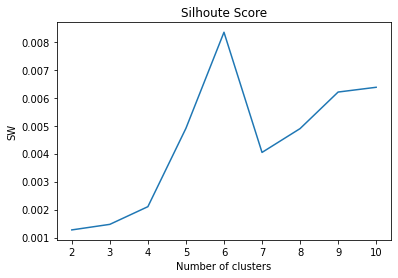

[0.0012725312254497762, 0.0014715184378794395, 0.002103748231522504, 0.004905556737350096, 0.008340778225457706, 0.004043669554535107, 0.004895299281046951, 0.006202287068875819, 0.00637288131900101]


In [43]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()
print(sw)

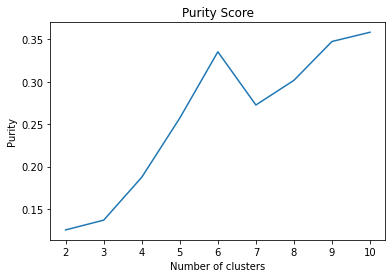

[0.1255591054313099, 0.13706070287539937, 0.18753993610223643, 0.2571884984025559, 0.3351437699680511, 0.27252396166134185, 0.3015974440894569, 0.3472843450479233, 0.35814696485623004]


In [44]:
plt.plot(range(2, 11), purity)
plt.title('Purity Score')
plt.xlabel('Number of clusters')
plt.ylabel('Purity')      #within cluster sum of squares
plt.show()
print(purity)